In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, explained_variance_score
from matplotlib.patches import Patch


# Load the dataset
file_path = './data/dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Methodology,Project,Bugs_Detected_Development,Bugs_Detected_Production,Test_Coverage_Percentage,Development_Time_Hours,Team_Size
0,TDD,TDD_Project_1,26,12,75.01,770,3
1,TDD,TDD_Project_2,39,12,89.88,689,5
2,TDD,TDD_Project_3,34,7,84.26,945,7
3,TDD,TDD_Project_4,30,10,84.17,674,5
4,TDD,TDD_Project_5,27,9,75.11,945,7


In [28]:
# Summary of the dataset
df.info()

# Descriptive statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Methodology                20 non-null     object 
 1   Project                    20 non-null     object 
 2   Bugs_Detected_Development  20 non-null     int64  
 3   Bugs_Detected_Production   20 non-null     int64  
 4   Test_Coverage_Percentage   20 non-null     float64
 5   Development_Time_Hours     20 non-null     int64  
 6   Team_Size                  20 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.2+ KB


,Bugs_Detected_Development,Bugs_Detected_Production,Test_Coverage_Percentage,Development_Time_Hours,Team_Size
count,20.000000,20.000000,20.000000,20.00000,20.000000
mean,26.300000,9.650000,85.644500,820.45000,5.250000
std,6.391606,4.042862,6.653591,137.40546,1.618154
min,16.000000,3.000000,75.010000,550.00000,3.000000
25%,23.000000,6.000000,82.327500,763.25000,3.750000
50%,26.000000,10.000000,86.240000,816.50000,6.000000
75%,30.000000,12.000000,90.317500,905.50000,7.000000
max,39.000000,18.000000,94.540000,1061.00000,7.000000


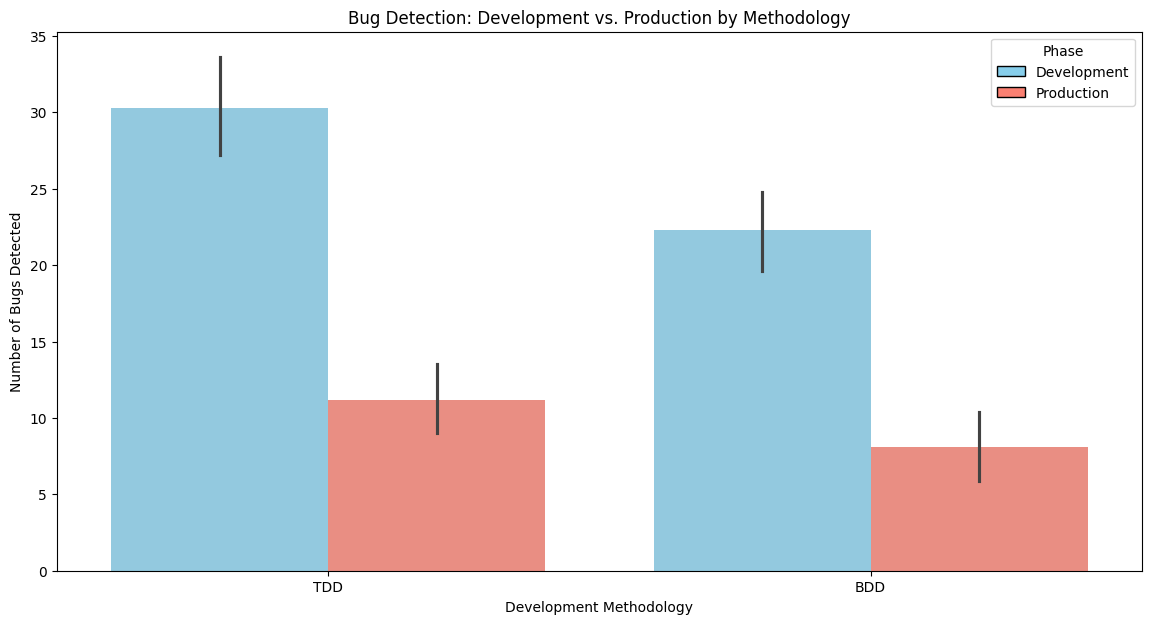

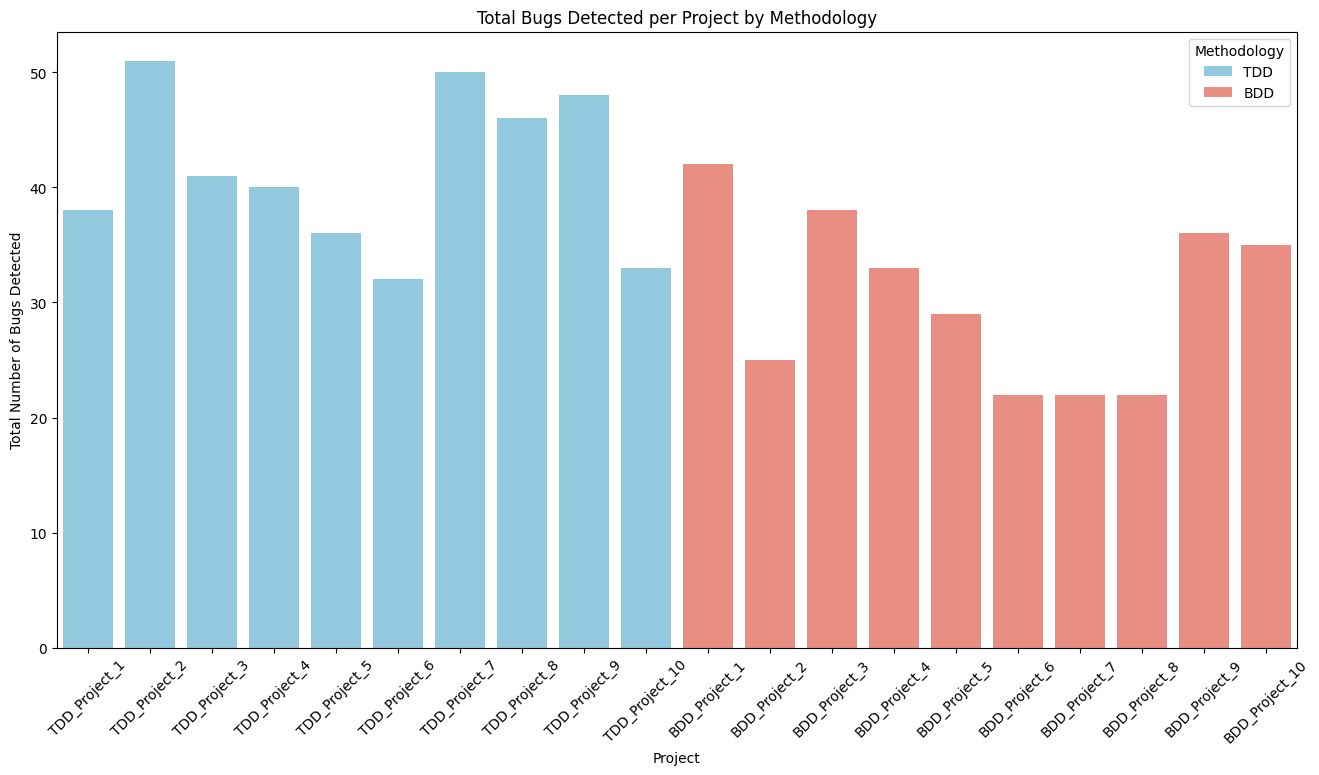

<ipython-input-29-08fb62df34e6>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Methodology', y='Bug_Detection_Rate_Development', data=df,


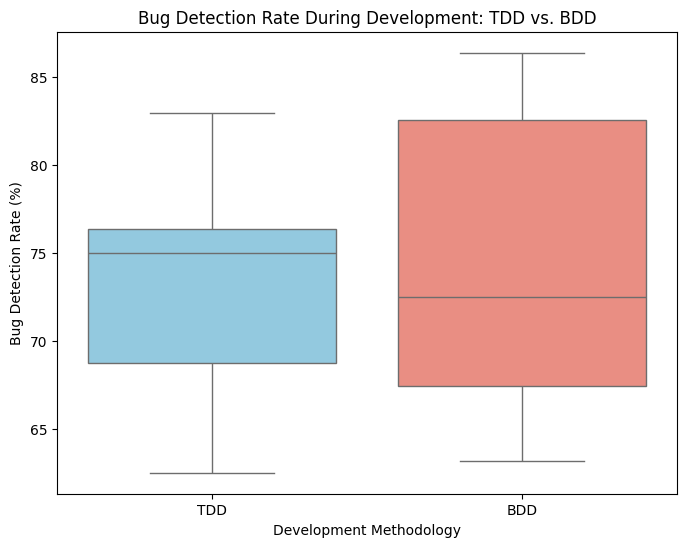

<ipython-input-29-08fb62df34e6>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Methodology', y='Bug_Detection_Rate_Production', data=df,


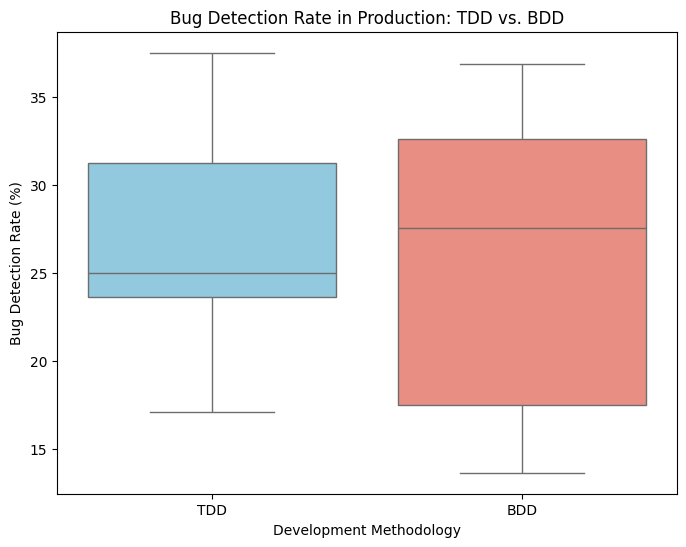

<ipython-input-29-08fb62df34e6>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Methodology', y='Test_Coverage_Percentage', data=df,


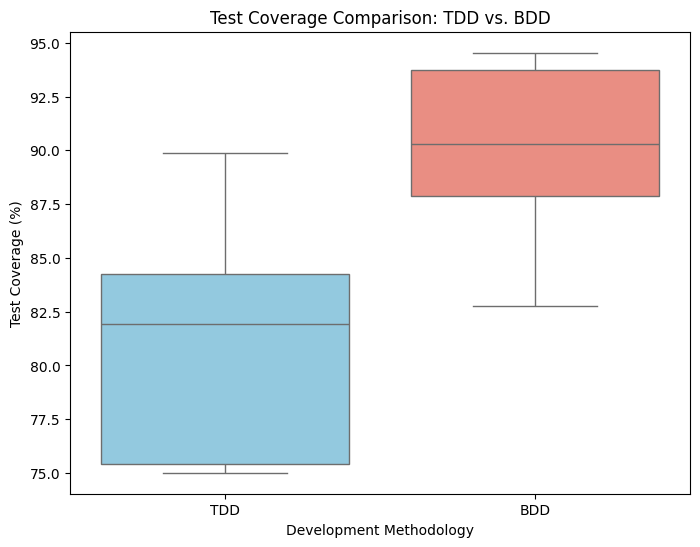

<ipython-input-29-08fb62df34e6>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Methodology', y='Development_Time_Hours', data=df,


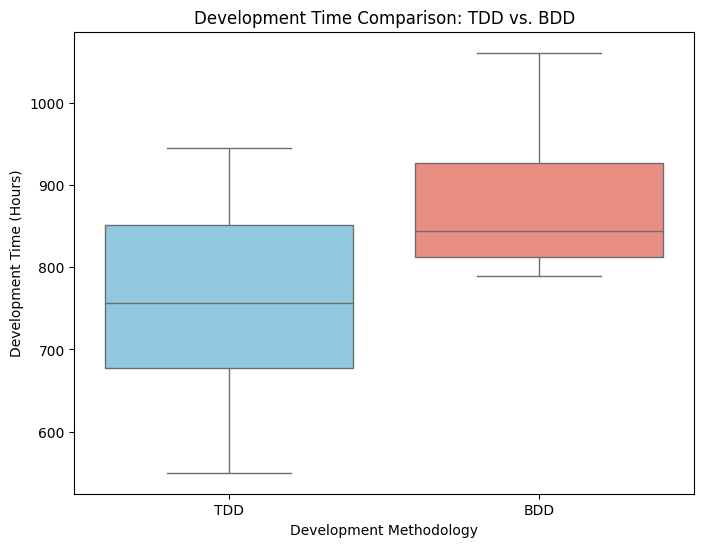

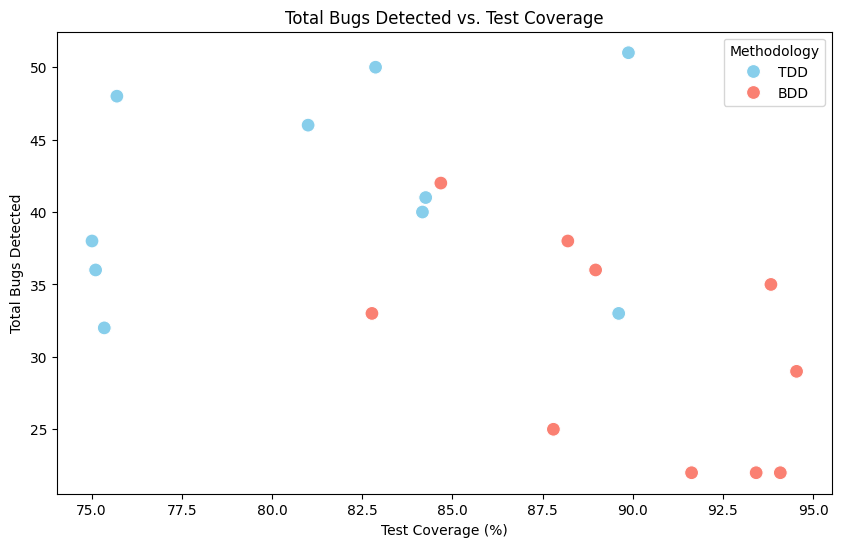

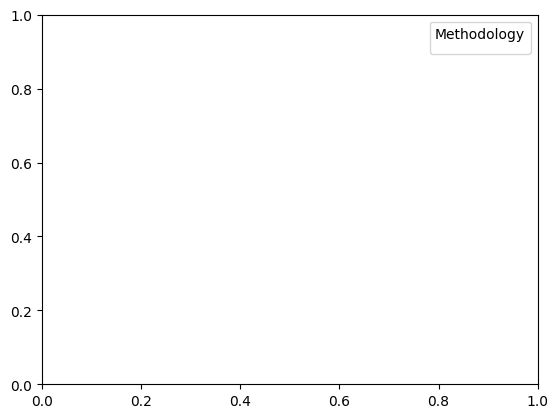

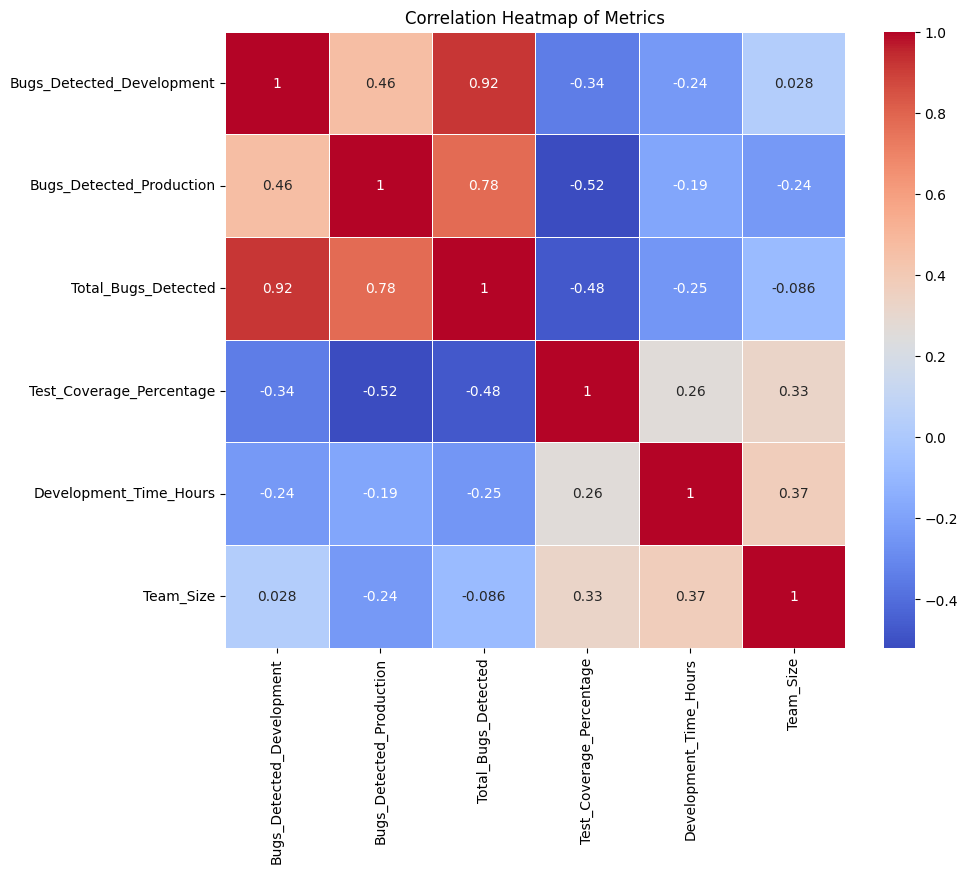

In [29]:
if 'Total_Bugs_Detected' not in df.columns:
    df['Total_Bugs_Detected'] = df['Bugs_Detected_Development'] + df['Bugs_Detected_Production']
df['Bug_Detection_Rate_Development'] = (df['Bugs_Detected_Development'] / df['Total_Bugs_Detected']) * 100
df['Bug_Detection_Rate_Production'] = (df['Bugs_Detected_Production'] / df['Total_Bugs_Detected']) * 100

# 1. Bugs Detected During Development vs. Production
plt.figure(figsize=(14, 7))
df_melted = df.melt(id_vars=['Methodology', 'Project'],
                    value_vars=['Bugs_Detected_Development', 'Bugs_Detected_Production'],
                    var_name='Phase',
                    value_name='Bug_Count')

sns.barplot(x='Methodology', y='Bug_Count', hue='Phase', data=df_melted,
            palette={'Bugs_Detected_Development': 'skyblue', 'Bugs_Detected_Production': 'salmon'})

plt.title('Bug Detection: Development vs. Production by Methodology')
plt.xlabel('Development Methodology')
plt.ylabel('Number of Bugs Detected')
custom_handles = [
    Patch(facecolor='skyblue', edgecolor='black', label='Development'),
    Patch(facecolor='salmon', edgecolor='black', label='Production')
]
plt.legend(handles=custom_handles, title='Phase')
plt.show()

# 2. Total Bugs Detected per Project
plt.figure(figsize=(16, 8))
sns.barplot(x='Project', y='Total_Bugs_Detected', hue='Methodology', data=df,
            palette=['skyblue', 'salmon'])

plt.title('Total Bugs Detected per Project by Methodology')
plt.xlabel('Project')
plt.ylabel('Total Number of Bugs Detected')
plt.xticks(rotation=45)
plt.legend(title='Methodology')
plt.show()

# 3. Bug Detection Rate During Development
plt.figure(figsize=(8, 6))
sns.boxplot(x='Methodology', y='Bug_Detection_Rate_Development', data=df,
            palette=['skyblue', 'salmon'])

plt.title('Bug Detection Rate During Development: TDD vs. BDD')
plt.xlabel('Development Methodology')
plt.ylabel('Bug Detection Rate (%)')
plt.show()

# 4. Bug Detection Rate in Production
plt.figure(figsize=(8, 6))
sns.boxplot(x='Methodology', y='Bug_Detection_Rate_Production', data=df,
            palette=['skyblue', 'salmon'])

plt.title('Bug Detection Rate in Production: TDD vs. BDD')
plt.xlabel('Development Methodology')
plt.ylabel('Bug Detection Rate (%)')
plt.show()

# 5. Test Coverage Percentage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Methodology', y='Test_Coverage_Percentage', data=df,
            palette=['skyblue', 'salmon'])

plt.title('Test Coverage Comparison: TDD vs. BDD')
plt.xlabel('Development Methodology')
plt.ylabel('Test Coverage (%)')
plt.show()

# 6. Development Time Comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Methodology', y='Development_Time_Hours', data=df,
            palette=['skyblue', 'salmon'])

plt.title('Development Time Comparison: TDD vs. BDD')
plt.xlabel('Development Methodology')
plt.ylabel('Development Time (Hours)')
plt.show()

# 7. Bug Detection vs. Test Coverage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Test_Coverage_Percentage', y='Total_Bugs_Detected', hue='Methodology', data=df,
                palette=['skyblue', 'salmon'], s=100)

plt.title('Total Bugs Detected vs. Test Coverage')
plt.xlabel('Test Coverage (%)')
plt.ylabel('Total Bugs Detected')
plt.show()
plt.legend(title='Methodology')

# 8. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[['Bugs_Detected_Development', 'Bugs_Detected_Production',
           'Total_Bugs_Detected', 'Test_Coverage_Percentage',
           'Development_Time_Hours', 'Team_Size']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Metrics')
plt.show()

In [31]:



# Define features and target
X = numeric_df.drop('Bugs_Detected_Production', axis=1)
y = numeric_df['Bugs_Detected_Production']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
ev_score = explained_variance_score(y_test, y_pred)
print('Principais métricas de avaliação do modelo:')
print('----------------------------------------')
print(f'MSE (Mean Squared Error): {mse:.4f}')
print(f'RMSE (Root Mean Squared Error): {rmse:.4f}')
print(f'MAE (Mean Absolute Error): {mae:.4f}')
print(f'R² (Coefficient of Determination): {r2:.4f}')
print(f'Explained Variance Score: {ev_score:.4f}')

# Calculate feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# # Evaluate the model
# calssif = classification_report(y_test, y_pred)
# acc= accuracy_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)


# mse, r2, acc, classif

Principais métricas de avaliação do modelo:
----------------------------------------
MSE (Mean Squared Error): 13.3949
RMSE (Root Mean Squared Error): 3.6599
MAE (Mean Absolute Error): 3.0990
R² (Coefficient of Determination): 0.2635
Explained Variance Score: 0.6334
